In [1]:
import jax.numpy as jnp
import jax.random as jrandom

import matplotlib.pyplot as plt
import pandas as pd
from jax import jit, grad, jacfwd, jacrev



from scipy.stats import linregress

from tqdm import tqdm
import pickle

import numpy as np

from jax.config import config
config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt

In [ ]:
# def helper_linesearch(f, g, c1, c2):

#     def helper(X, search_direction):
#         f0 = f(X)
#         f1 = g(X)
#         dg = jnp.inner(search_direction, f1)

#         def armijo_rule(alpha):
#             return f(X + alpha * search_direction) > f0 + c1*alpha*dg
        
#         def armijo_update(alpha):
#             return c2*alpha
            
#         alpha = 1
#         while armijo_rule(alpha):
#             alpha = armijo_update(alpha)


#         return alpha

#     return helper

# def loss_getter(dim, N, H, sig):
#     def helper(X):
    
#         S = X.reshape(N, dim).T

#         SS = S.dot(S.T)

#         SS_inv = jnp.linalg.inv(SS)
#         S_sum = jnp.sum(S, axis=1)  

#         first_term = S.dot(jnp.diag(S.T.dot(H.dot(S))))
#         second_term = jnp.linalg.norm(SS_inv.dot(S), ord="fro")**2        
#         third_term = S_sum.T.dot(SS_inv.dot(SS_inv.dot(S_sum)))  
        
#         return jnp.linalg.norm(SS_inv.dot(first_term))**2 + sig**2*(second_term + third_term)
#     return helper

# def optimize_uncentered_S(H, sig, max_steps=15, jrandom_key=None, x_curr=None):
    
#     dim = H.shape[0]
#     N = dim
    
#     H = (H + H.T) / 2. # to combat numerical inaccuracies. 
#     D, U = jnp.linalg.eig(H)
#     U = jnp.real(U)

#     # print("D", repr(jnp.real(D)))
#     D = jnp.diag(D)

#     if x_curr is None:
#         if jrandom_key is None:
#             x_curr = jnp.diag(jnp.sqrt(sig / jnp.abs(jnp.diag(D)))).flatten()
#         else:
#             x_curr = jrandom.normal(jrandom_key, shape=(dim * dim,)) * 0.2
        
    
        
# #     x_curr = jnp.array([ 0.05915076, -0.0340726 ,  0.01818264, -0.31835382,
# #              -0.05880886, -0.04264622,  0.01758689, -0.35780406,
# #              -0.00296912,  0.07070069,  0.02147466, -0.25530761,
# #               0.00104251,  0.00597147, -0.09367059, -0.20932359])
    
#     l = loss_getter(dim, N, D, sig)
#     g_l = grad(l)
#     linesearch = helper_linesearch(l, g_l, c1=0.01, c2=0.7)

#     eps = 1e-4

#     res = []
#     res_x = []

#     for t in range(max_steps):
        
# #         D = jnp.sqrt(jnp.linalg.inv(H))
# #         tmp = x_curr.reshape(N, dim).T
# #         tmp = D.dot(tmp")
# #         tmp = tmp.dot(jnp.diag(1/jnp.linalg.norm(tmp, axis=0))) * jnp.mean(jnp.linalg.norm(tmp, axis=0))
# #         tmp = jnp.linalg.inv(D).dot(tmp)
# #         x_curr = tmp.T.flatten()
        
#         res.append(l(x_curr))
# #         res_x.append(U.dot(x_curr.reshape(N, dim).T)) # TURN ON FOR HISTORY 

#         curr_grad = g_l(x_curr)
#         # print(curr_grad)
#         if jnp.linalg.norm(curr_grad) < eps:
#             break    

#         search_direction = -curr_grad
#         alpha = linesearch(x_curr, search_direction)

#         S = x_curr.reshape(N, dim).T

#         SS = S.dot(S.T)

#         x_curr += alpha*search_direction 
    
#     return U.dot(x_curr.reshape(N, dim).T), res

In [ ]:
jnp.sum(jnp.linalg.inv(opt_S), axis=0)

In [ ]:
dim = 2

jrandom_key = jrandom.PRNGKey(2)
jrandom_key, subkey = jrandom.split(jrandom_key)
H = jrandom.normal(subkey, shape=(dim, dim,))
H = (H + H.T)/2.

In [ ]:
sig = 1
l = loss_getter(dim, dim, H, sig)

In [ ]:

H = np.diag(np.linspace(1, 10, dim))/10.
opt_S, loss_hist = optimize_uncentered_S(H, sig, max_steps=500)

In [ ]:
res = []
hists = []

jrandom_key = jrandom.PRNGKey(90)
for a in [2]:#tqdm(jnp.linspace(-10, 10, 4)):
    H = jnp.diag(jnp.array([3, a])) 
    jrandom_key, subkey = jrandom.split(jrandom_key )
    opt_S, loss_hist = optimize_uncentered_S(H, sig=0.01 / 0.1 , max_steps=400, jrandom_key=subkey)
    res.append(opt_S)
    hists.append(loss_hist)

In [ ]:
res = jnp.array(res)
dim = 2
l = loss_getter(dim, dim, H, sig=0.1)
gl = grad(l)
hl = jacfwd(lambda x: gl(x))


for i in range(len(res)):

#     plt.plot(hists[i])
#     plt.yscale("log")

#     print(gl(res[i].T.flatten()))
#     print(l(res[i].T.flatten()))
#     print(jnp.linalg.eig(hl(res[i].T.flatten()))[0])
#     a = abs(jnp.linspace(-10, 10, 3.1)[i])
#     a = 1

    print(a)
#     a = 3.1
    
    H = jnp.diag(jnp.array([0.1, a])) 
#     H = jnp.eye(2)
    X = jnp.linspace(0, jnp.sqrt(1/H[0,0]) - 1e-10, 100)
    Y = jnp.array([jnp.sqrt((1 - H[0, 0] * x**2) / H[1, 1]) for x in X])
    X = jnp.concatenate([X, X, -X, -X])
    Y = jnp.concatenate([Y, -Y, Y, -Y])
    
    val = res[i][:, 0].dot(H.dot(res[i][:, 0]))
    
    
    plt.scatter(X*val**0.5, Y*val**0.5)
    
    H = jnp.diag(jnp.array([3, a])) 
#     H = jnp.eye(2)
    X = jnp.linspace(0, jnp.sqrt(1/H[0,0]) - 1e-10, 100)
    Y = jnp.array([jnp.sqrt((1 - H[0, 0] * x**2) / H[1, 1]) for x in X])
    X = jnp.concatenate([X, X, -X, -X])
    Y = jnp.concatenate([Y, -Y, Y, -Y])
    val = res[i][:, 0].dot(H.dot(res[i][:, 0]))


#     plt.scatter(X*val**0.5, Y*val**0.5)


    print(hists[i][-1])
    print(repr(res[i]))
    print(H)
#     print()
    
    plt.scatter(res[i][0], res[i][1])
    
    resres = (H**(0.5)).dot(res[i])
    print(res[i].T.dot(H).dot(res[i]))
    print(np.linalg.inv(res[i]).T.dot(np.ones(2)))
    resres = np.array([[1/np.sqrt(2), 1/np.sqrt(2)], [-1/np.sqrt(2), np.sqrt(2)]]).dot(resres)
    plt.scatter(resres[0], resres[1])
    
    x_b = max([jnp.abs(jnp.min(res[:, 0])), jnp.abs(jnp.max(res[:, 0]))]) * 1.1
    y_b = max([jnp.abs(jnp.min(res[:, 1])), jnp.abs(jnp.max(res[:, 1]))]) * 1.1

#     plt.xlim(-x_b, x_b)
#     plt.ylim(-y_b, y_b)
    
#     plt.xlim(-2, 2)
#     plt.ylim(-2, 2)

    plt.grid()

    plt.show()
    
    print()

In [ ]:
def gg(D):
    
    X = jnp.eye(D.shape[0]).flatten()
    
    l = lambda x: jnp.linalg.norm(jnp.linalg.inv(D.dot(x.reshape(D.shape))), "fro")
    gl = grad(l)
    
    linesearch = helper_linesearch(l, gl, c1=0.01, c2=0.7)


    for _ in range(10):
        search_dir = -gl(X)
        alpha = linesearch(X, search_dir)
        X += alpha * search_dir
        
    return X

D = jnp.array([[1, 0], [0, 2]])
gg(D)

In [ ]:
H = jnp.diag(jnp.linspace(100, 0.1, 4))


for _ in range(10):
    jrandom_key, subkey = jrandom.split(jrandom_key)
    opt_S, loss_hist = optimize_uncentered_S(H, sig=0.01 / 0.1 , max_steps=50, jrandom_key=subkey)
    print(loss_hist[-1])
    print(jnp.diag(opt_S.T.dot(H.dot(opt_S))))
    print()



In [ ]:
opt_S, loss_hist = optimize_uncentered_S(H, sig=0.01 / 0.1 , max_steps=500, jrandom_key=None)
print(loss_hist[-1])
print(jnp.diag(opt_S.T.dot(H.dot(opt_S))))

In [ ]:
opt_S.T.flatten()

In [ ]:
dim = 2
l = loss_getter(dim, dim, H, sig)
print(grad(l)(opt_S.T.flatten()))

In [ ]:
print(grad(l)(res.T.flatten()))

In [ ]:
grad(l)(opt_S.T.flatten())

In [ ]:
print(repr(res.T.flatten()))

In [ ]:
res

In [ ]:
opt_S.T.flatten()

In [ ]:
opt_S.T.dot(H.dot(opt_S))

In [ ]:
jnp.linalg.inv(D).dot(opt_S)

In [ ]:
jnp.linalg.norm(jnp.linalg.inv(D).dot(opt_S), axis=0)

In [ ]:
A = jnp.linalg.inv(opt_S / 0.69741662)
print(A)
print(t/jnp.pi*2)
C1 = jnp.linalg.norm(A, "fro")
C2 = jnp.linalg.norm(jnp.sum(A.T, axis=1))
print(jnp.sqrt(C1 + C2) * (jnp.sqrt(C1) + 1/jnp.sqrt(C1)))

In [ ]:
T = jnp.array([[ 2.23606798,  0.2236068 ],
 [-2.23606798,  0.2236068 ]])
jnp.linalg.inv(D).dot(jnp.linalg.inv(T))


In [ ]:
jnp.linalg.inv(opt_S)

In [ ]:
opt_S.T.dot(H.dot(opt_S))

In [ ]:
opt_S

In [ ]:
dim = 4
l = loss_getter(dim, dim, H, sig)
print(l(opt_S.T.flatten()))

In [ ]:
D = jnp.sqrt(jnp.linalg.inv(H))


tmp = opt_S
tmp = D.dot(tmp)
print(tmp)
tmp = tmp.dot(jnp.diag(1/jnp.linalg.norm(tmp, axis=0))) * jnp.linalg.norm(tmp, axis=0)[0]
print(tmp)
tmp = jnp.linalg.inv(D).dot(tmp)

In [ ]:
print(l(opt_S.T.flatten()))

In [ ]:
tmp.T.dot(H.dot(tmp))

In [ ]:
tmp.T.flatten()

In [ ]:
jnp.diag(opt_S.T.dot(H.dot(opt_S)))

In [ ]:
opt_S

In [ ]:
D = jnp.sqrt(jnp.linalg.inv(H))


for _ in range(100):
    jrandom_key, subkey = jrandom.split(jrandom_key)
    U = jrandom.normal(subkey, shape=(4, 4,))
    U /= jnp.linalg.norm(U, axis=0)
    S = D.dot(U)
    
    m_val = float('inf')
    m_S = None
    for h in jnp.logspace(-4, 1, 10):
        if l(h*S.T.flatten()) < m_val:
            m_val = l(h*S.T.flatten())
            m_S = h*S
            
    print(m_val)
    

## Here we are going to compute the derivatives of each term

In [191]:
dim = 3
N = dim

jrandom_key = jrandom.PRNGKey(1)
jrandom_key, subkey = jrandom.split(jrandom_key)
U = jrandom.normal(subkey, shape=(dim, N))
U /= jnp.linalg.norm(U, axis=0)
D_half = jnp.diag(jnp.linspace(1, 10, dim))
D = D_half**2
a = jnp.linspace(5, 15, dim)
A = jnp.diag(a)
U_inv = jnp.linalg.inv(U)
U_inv_T = U_inv.T
A_inv = jnp.diag(1/a)

In [194]:
first_A_term = lambda A: jnp.linalg.norm(D_half @ U_inv_T @ jnp.diag(A.reshape(dim, dim)))**2
g_first_A_term = lambda A: grad(first_A_term)(A).reshape(dim, N)

analytic_g_first_A = lambda A: 2 * U_inv @ D @ U_inv_T @ jnp.outer(a, jnp.ones(dim))

print("Exact g", g_first_A_term(A.flatten()))
print("Analytic g", analytic_g_first_A(A))

Exact g [[12570.47427468     0.             0.        ]
 [    0.         -6265.11970908     0.        ]
 [    0.             0.          7523.56219726]]
Analytic g [[12570.47427468 12570.47427468 12570.47427468]
 [-6265.11970908 -6265.11970908 -6265.11970908]
 [ 7523.56219726  7523.56219726  7523.56219726]]


In [185]:
second_A_term = lambda A: jnp.linalg.norm(jnp.linalg.inv(A.reshape(dim, dim)) @ U_inv @ D_half, "fro")**2
g_second_A_term = lambda A: grad(second_A_term)(A).reshape(dim, N)

analytic_g_second_A = lambda A_inv: -2 *  U_inv @ D @ U_inv.T @ A_inv**3

print("Exact g", g_second_A_term(A.flatten()))
print("Analytic g", analytic_g_second_A(A_inv))

Exact g [[-12.11622848   3.57635372  -2.47799392]
 [  1.78817686  -0.69122928   0.38697646]
 [ -0.82599797   0.25798431  -0.17149571]]
Analytic g [[-12.11622848   0.89408843  -0.27533266]
 [  7.15270744  -0.69122928   0.17198954]
 [ -7.43398175   0.58046469  -0.17149571]]


In [189]:
third_A_term = lambda A: jnp.linalg.norm(D_half @ U_inv_T @ jnp.diag(jnp.linalg.inv(A.reshape(dim, dim))))**2
g_third_A_term = lambda A: grad(third_A_term)(A).reshape(dim, N)

analytic_g_third_A = lambda A: - 2 * U_inv @ D @ U_inv_T @ jnp.outer(1/a, 1/a**2) 

print("Exact g", g_third_A_term(A.flatten()))
print("Analytic g", analytic_g_third_A(A_inv))

Exact g [[-11.01786867   0.           0.        ]
 [  0.           1.48392404   0.        ]
 [  0.           0.          -0.73950938]]
Analytic g [[-11.01786867  -2.75446717  -1.22420763]
 [  5.93569615   1.48392404   0.65952179]
 [ -6.65558441  -1.6638961   -0.73950938]]


In [112]:
first_term = lambda U_inv: jnp.linalg.norm(D_half @ U_inv.reshape(dim, N).T @ a)**2
g_first_term = lambda U_inv: grad(first_term)(U_inv).reshape(dim, N)

analytic_g_first = lambda U_inv: 2 * np.outer(a, a) @ U_inv.reshape(dim, N) @ D_half**2

print("Exact g", g_first_term(U_inv.flatten()))
print("Analytic g", analytic_g_first(U_inv.flatten()))



Exact g [[-1.00583772e+01 -4.72979961e+03 -2.74042177e+03]
 [-2.01167544e+01 -9.45959923e+03 -5.48084355e+03]
 [-3.01751316e+01 -1.41893988e+04 -8.22126532e+03]]
Analytic g [[-1.00583772e+01 -4.72979961e+03 -2.74042177e+03]
 [-2.01167544e+01 -9.45959923e+03 -5.48084355e+03]
 [-3.01751316e+01 -1.41893988e+04 -8.22126532e+03]]


In [121]:
second_term = lambda U_inv: jnp.linalg.norm(A_inv @ U_inv.reshape(dim, dim) @ D_half, "fro")**2 
g_second_term = lambda U_inv: grad(second_term)(U_inv).reshape(dim, N)

analytic_g_second = lambda U_inv: 2 * A_inv**2 @ U_inv.reshape(dim, dim) @ D

print("Exact g", g_second_term(U_inv.flatten()))
print("Analytic g", analytic_g_second(U_inv.flatten()))

Exact g [[-0.07349626 -0.55062823 -8.24363717]
 [-0.03919891 -0.14805724 -0.14729715]
 [ 0.01374052 -0.21602197  0.18656813]]
Analytic g [[-0.07349626 -0.55062823 -8.24363717]
 [-0.03919891 -0.14805724 -0.14729715]
 [ 0.01374052 -0.21602197  0.18656813]]


In [128]:
e_idx = 0 
e_vec = np.zeros(dim)
e_vec[e_idx] = 1
e_vec = jnp.array(e_vec)
constraint_term = lambda U_inv: jnp.linalg.norm(jnp.linalg.inv(U_inv.reshape(dim, dim))[:, e_idx])**2 
g_constraint_term = lambda U_inv: grad(constraint_term)(U_inv).reshape(dim, N)

analytic_g_constraint = lambda U: - 2 * U.T @ U @ jnp.outer(e_vec, e_vec) @ U.T

print("Exact g", g_constraint_term(U_inv.flatten()))
print("Analytic g", analytic_g_constraint(U))

Exact g [[-0.11173332  0.30075564  1.9740977 ]
 [ 0.05162012 -0.13894728 -0.91202118]
 [-0.00499371  0.01344171  0.08822861]]
Analytic g [[-0.11173332  0.30075564  1.9740977 ]
 [ 0.05162012 -0.13894728 -0.91202118]
 [-0.00499371  0.01344171  0.08822861]]


In [119]:
import numpy as np

In [ ]:
def createS(ts, dim):
    S = []
    for c in range(dim):
        tmp_S = []
        for r in range(dim):
            curr_term = 1
            if len(tmp_S) > 0:
                curr_term = tmp_S[-1] / np.cos(ts[c][r-1]) * np.sin(ts[c][r - 1])
            if r < dim - 1:
                curr_term *= np.cos(ts[c][r])
                
            tmp_S.append(curr_term)
        S.append(tmp_S)
    S = np.array(S).T
    return S

def createPartialS(ts, dim, r_theta, c_theta):
    
    S = []
    for c in range(dim):
        tmp_S = []
        for r in range(dim):
            if c != c_theta:
                tmp_S.append(0)
                continue
                
            curr_term = 1
            if len(tmp_S) > 0:
                if r == r_theta + 1:
                    curr_term = - tmp_S[-1] / np.sin(ts[c][r - 1]) * np.cos(ts[c][r - 1])
                else:
                    curr_term = tmp_S[-1] / np.cos(ts[c][r - 1]) * np.sin(ts[c][r - 1])
            if r < dim - 1:
                if r == r_theta:
                    curr_term *= -np.sin(ts[c][r])
                else:
                    curr_term *= np.cos(ts[c][r])
                
            tmp_S.append(curr_term)
            
        S_to_append = np.zeros(dim)
        S_to_append[r_theta:] = tmp_S[r_theta:]
        S.append(S_to_append)
    S = np.array(S).T
    return S

In [ ]:
dim = 5
A = np.diag(np.linspace(1, 5, dim))
D = np.diag(np.linspace(5, 10, dim))
ts = np.random.normal(size=(dim, dim-1))

In [ ]:
print("First term")
h = 0.00001
first_term = lambda ts: np.linalg.norm(D.dot(np.linalg.inv(createS(ts, dim)).T).dot(np.diag(A)))**2

r, c = 1, 1
h_ts = ts.copy()
h_ts[c][r] += h
print("FD Estimate", (first_term(h_ts) - first_term(ts))/h)

In [ ]:
S = createS(ts, dim)
S_inv = np.linalg.inv(S)
p_S = createPartialS(ts, dim, r, c)
-np.trace(2 * ((D**2).dot(S_inv.T).dot(np.outer(np.diag(A), np.diag(A)))).dot(S_inv).dot(p_S).dot(S_inv))

In [ ]:
print("Second term")
h = 0.00001
second_term = lambda ts: np.linalg.norm(D.dot(np.linalg.inv(createS(ts, dim)).T).dot(1/np.diag(A)))**2

r, c = 1, 1
h_ts = ts.copy()
h_ts[c][r] += h
print("FD Estimate", (second_term(h_ts) - second_term(ts))/h)

S = createS(ts, dim)
S_inv = np.linalg.inv(S)
p_S = createPartialS(ts, dim, r, c)
print("analytic", -np.trace(2 * ((D**2).dot(S_inv.T).dot(np.outer(1/np.diag(A), 1/np.diag(A)))).dot(S_inv).dot(p_S).dot(S_inv)))

In [ ]:
print("Third term")
h = 0.00001
third_term = lambda ts: np.linalg.norm(np.linalg.inv(A).dot(np.linalg.inv(createS(ts, dim))).dot(D), "fro")**2

r, c = 1, 1
h_ts = ts.copy()
h_ts[c][r] += h
print("FD Estimate", (third_term(h_ts) - third_term(ts))/h)

S = createS(ts, dim)
S_inv = np.linalg.inv(S)
p_S = createPartialS(ts, dim, r, c)
print("analytic", -np.trace(2 * ((D**2).dot(S_inv.T).dot(np.linalg.inv(A)**2).dot(S_inv).dot(p_S).dot(S_inv))))



In [ ]:
f = lambda S: np.linalg.norm(D.dot(S).dot(np.diag(A)))**2

r, c = 3, 2
S_inv = np.linalg.inv(S)
# tmp_S_inv = S_inv.copy()



res = np.zeros(shape=(dim, dim))
for c in range(dim):
    for r in range(dim):
        tmp_S_inv = S_inv.copy()
        tmp_S_inv[c][r] += h
    
        res[c][r] = (f(tmp_S_inv.T) - f(S_inv.T))/h
res

In [ ]:
(2 * ((D**2).dot(S_inv.T).dot(np.outer(np.diag(A), np.diag(A))))).T

In [ ]:
D = jnp.diag(jnp.array([1, 2]))

A = jnp.array([2, 3])

def f(X):
    X = jnp.linalg.inv(X.reshape(2, 2))

    return jnp.linalg.norm(D.dot(X.T.dot(A))) + jnp.linalg.norm(D.dot(X.T.dot(1/A)))

gf = grad(f)




In [ ]:
t = np.pi/4
X = jnp.array([[np.cos(t), np.sin(t)], [-np.sin(t), np.cos(t)]])
print(X.T.dot(X))
X = X.flatten()

gf(X)

In [ ]:
min_val = float("inf")
min_S = None
for _ in range(1000):
    X = np.random.normal(size=(2, 2))
    X /= jnp.linalg.norm(X, axis=0)
    X = X.flatten()
    
    curr_val = f(X)
    if curr_val < min_val:
        min_val = curr_val
        min_S = X
    

In [ ]:
min_val

In [ ]:
S = min_S.reshape(2, 2)
print(S)
S.T.dot(S)

In [ ]:
np.linalg.eig(S.T.dot(S))

In [ ]:
S.T.dot(A)

In [ ]:
A

In [ ]:
def createU(dim):
    res = [jnp.ones(dim)/jnp.linalg.norm(jnp.ones(dim))]
    for i in range(dim-1):
        tmp = np.zeros(dim)
        tmp[:i+1] = 1
        tmp[i + 1] = -(i + 1)
        tmp /= np.linalg.norm(tmp)
        res.append(tmp)
        
    return jnp.array(res).T
    


In [ ]:
dim = 3
N = dim
D = jnp.diag(jnp.linspace(1, 10, dim))
sig = 1

l = loss_getter(dim, N, D, sig)
g_l = grad(l)

In [ ]:
jnp.diag(jnp.linalg.inv((D**(1/2) @ opt_S)).T @ jnp.linalg.inv((D**(1/2) @ opt_S)))

In [ ]:
jnp.linalg.inv(opt_S).T @ jnp.ones(3)

In [ ]:
np.diag(jnp.linalg.inv(opt_S).T @ jnp.linalg.inv(opt_S))

In [ ]:
jnp.linalg.inv(opt_S).T @ jnp.linalg.inv(opt_S)

In [ ]:
jnp.linalg.inv(opt_S).T

In [ ]:
jnp.linalg.inv(opt_S).T @ jnp.diag(opt_S.T @ D @ opt_S)

In [ ]:
opt_S

In [ ]:
opt_S

In [ ]:
opt_S

In [ ]:
res = []
jrandom_key = jrandom.PRNGKey(0)
eps = 1e-4
for _ in range(1000):
    jrandom_key, subkey = jrandom.split(jrandom_key)
    res.append(jnp.linalg.norm(g_l(opt_S.T.flatten() + eps*jrandom.normal(subkey, shape=(9,)))))

In [ ]:
sorted(res)[:10]

In [ ]:
plt.hist(res)

In [ ]:
opt_S.T.dot(D).dot(opt_S)

In [ ]:
tmp_opt_S = jnp.array([[3.7079922 , 1.41161719, 0.96125943],
             [1.41161719, 3.62470546, 1.22752748],
             [0.96125943, 1.22752748, 3.75054208]])

In [ ]:
g_l(opt_S.T.flatten())

In [ ]:
jnp.linalg.eig(jacfwd(g_l)(opt_S.T.flatten()))

In [ ]:
g_l(opt_S.T.flatten())

In [ ]:
l(tmpopt_S.T.flatten())

In [ ]:
tmp_S = jnp.array([[-4.02946125, -4.24458177, -3.93768356],
                   [-1.21511798, -0.16389699,  1.51670678],
                   [ 0.89150776, -1.25773531,  0.59004385]])

tmp_S = jnp.array([[-4.1, -4.1, -4.1],
                   [-1.2, -0.2,  1.53],
                   [ 0.9, -1.25,  0.6]])

print(tmp_S.T.flatten())
print(l(tmp_S.T.flatten()))
g_l(tmp_S.T.flatten())

In [ ]:
(D**0.5).dot(opt_S)

In [ ]:
jnp.linalg.inv(opt_S)

In [ ]:
np.linalg.norm(opt_S, axis=0)

In [ ]:
jnp.linalg.norm(jnp.linalg.inv(opt_U).T.dot(jnp.ones(dim)))

In [ ]:
jnp.linalg.norm(jnp.linalg.inv(opt_S), "fro")

In [ ]:
jnp.linalg.norm(jnp.linalg.inv(x_curr), "fro")

In [ ]:
jnp.trace(jnp.linalg.inv(opt_U).T.dot(jnp.linalg.inv(opt_U)).dot(D))

In [ ]:
x_inv = jnp.linalg.inv((D**0.5).dot(x_curr))
x_inv.T.dot(x_inv)

In [ ]:
jnp.linalg.inv(opt_U).T.dot(jnp.linalg.inv(opt_U))

In [ ]:
jnp.linalg.norm(jnp.linalg.inv(opt_U).dot(D**0.5), "fro")**2

In [ ]:
jnp.linalg.norm(jnp.linalg.inv(opt_U), "fro") * jnp.linalg.norm(D**(0.5), "fro")

In [ ]:
jnp.linalg.inv(opt_U).T.dot(jnp.ones(dim))

In [ ]:
np.linalg.svd(opt_U)

In [ ]:
(D**(0.5)).dot(x_curr)

In [ ]:
opt_U = (D**(0.5)).dot(opt_S)
opt_U.T.dot(opt_U)

In [ ]:
g_l(opt_S.T.flatten())

In [ ]:
U = createU(dim)
S = jnp.linalg.inv(D**(0.5)).dot(U)

print(S)
for a in jnp.linspace(1, 10, 10):
    curr_S = a * S
    
    print(a)
    print(g_l(curr_S.T.flatten()))
    print(l(curr_S.T.flatten()))
    print()

In [597]:
def helper_linesearch(f, g, c1, c2):

    def helper(X, search_direction):
        f0 = f(X)
        f1 = g(X)
        dg = jnp.inner(search_direction, f1)

        def armijo_rule(alpha):
            return f(X + alpha * search_direction) > f0 + c1*alpha*dg
        
        def armijo_update(alpha):
            return c2*alpha
            
        alpha = 1
        while armijo_rule(alpha):
            alpha = armijo_update(alpha)


        return alpha

    return helper

def loss_getter(dim, N, H, sig):
    def helper(X):
    
#         S = X.reshape(N, dim).T

#         SS = S.dot(S.T)

#         SS_inv = jnp.linalg.inv(SS)
#         S_sum = jnp.sum(S, axis=1)  

#         first_term = 10*S.dot(jnp.diag(S.T.dot(H.dot(S))))
#         first_term = jnp.linalg.norm(SS_inv.dot(first_term))**2
        
#         second_term = 0#*jnp.linalg.norm(SS_inv.dot(S), ord="fro")**2        
#         third_term = S_sum.T.dot(SS_inv.dot(SS_inv.dot(S_sum)))  
        
#         return  + sig**2*(second_term + third_term)

        S = X.reshape(N, dim).T
        
        S_inv = jnp.linalg.inv(S)
        
        first_term = S_inv.T @ jnp.diag(S.T @ H @ S)
        second_term = jnp.linalg.norm(S_inv, ord="fro")**2
        third_term = S_inv.T @ jnp.ones(dim)
        third_term = jnp.linalg.norm(third_term)**2
        
        return jnp.linalg.norm(first_term)**2 + sig**2 * (second_term + third_term)

    return helper

def optimize_uncentered_S(H, sig, max_steps=15, jrandom_key=None, x_curr=None):
    
    dim = H.shape[0]
    N = dim
    
    H = (H + H.T) / 2. # to combat numerical inaccuracies. 
    D, U = jnp.linalg.eig(H)
    U = jnp.real(U)

    # print("D", repr(jnp.real(D)))
    D = jnp.diag(D)

    if x_curr is None:
        if jrandom_key is None:
#             x_curr = jnp.diag(jnp.sqrt(sig / jnp.abs(jnp.diag(D)))).flatten()
            pass
        else:
            x_curr = jrandom.normal(jrandom_key, shape=(dim * dim,)) * 0.1
        
    
        
#     x_curr = jnp.array([ 0.05915076, -0.0340726 ,  0.01818264, -0.31835382,
#              -0.05880886, -0.04264622,  0.01758689, -0.35780406,
#              -0.00296912,  0.07070069,  0.02147466, -0.25530761,
#               0.00104251,  0.00597147, -0.09367059, -0.20932359])
    
    l = loss_getter(dim, N, D, sig)
    g_l = grad(l)
    h_l = jacfwd(g_l)
    linesearch = helper_linesearch(l, g_l, c1=0.2, c2=0.9)

    eps = 1e-20

    res = []
    res_x = []

    for t in tqdm(range(max_steps)):
        
#         D = jnp.sqrt(jnp.linalg.inv(H))
#         tmp = x_curr.reshape(N, dim).T
#         tmp = D.dot(tmp")
#         tmp = tmp.dot(jnp.diag(1/jnp.linalg.norm(tmp, axis=0))) * jnp.mean(jnp.linalg.norm(tmp, axis=0))
#         tmp = jnp.linalg.inv(D).dot(tmp)
#         x_curr = tmp.T.flatten()
#         x_curr = np.array(x_curr.reshape(N, dim).T)
#         x_curr[0] = np.mean(x_curr[0])
#         x_curr = jnp.array(x_curr).T.flatten()
        
        res.append(l(x_curr))
#         res_x.append(U.dot(x_curr.reshape(N, dim).T)) # TURN ON FOR HISTORY 

        curr_grad = g_l(x_curr)
    
        # print(curr_grad)
        curr_hess = h_l(x_curr) #+ 0.2*jnp.eye(9)
        search_direction = -jnp.linalg.inv(curr_hess) @ curr_grad #+ np.random.normal(size=(16))*0.1
#         search_direction = -curr_grad #+ np.random.normal(size=(9))*0.1

        if jnp.linalg.norm(curr_grad) < eps:
            break    

        alpha = linesearch(x_curr, search_direction)

        S = x_curr.reshape(N, dim).T

        SS = S.dot(S.T)

        x_curr += alpha*search_direction 
    
    return U.dot(x_curr.reshape(N, dim).T), res

In [598]:
dim = 3
N = dim
D = jnp.diag(jnp.linspace(1, 10, dim))
sig = 1

l = loss_getter(dim, N, D, sig)
g_l = grad(l)

In [599]:
jrandom_key = jrandom.PRNGKey(2)
jrandom_key, subkey = jrandom.split(jrandom_key)
opt_S, l_hist = optimize_uncentered_S(D, sig=sig, max_steps=10, jrandom_key=subkey, x_curr=opt_S.T.flatten())

100%|██████████| 10/10 [00:07<00:00,  1.54it/s]


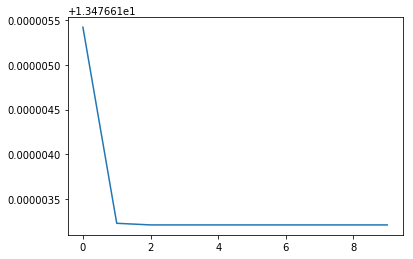

In [600]:
plt.plot(l_hist)
# plt.yscale("log")

In [601]:
g_l(opt_S.T.flatten())

DeviceArray([ 0.00000000e+00,  1.77635684e-14, -1.68753900e-14,
              8.88178420e-16,  7.10542736e-15,  1.24344979e-14,
             -1.33226763e-15, -2.31781586e-15, -1.06581410e-14],            dtype=float64)

In [602]:
jnp.linalg.eig(jacfwd(g_l)(opt_S.T.flatten()))

[DeviceArray([4.31040316e+02+0.j, 2.74094236e+02+0.j, 9.63970140e+01+0.j,
              4.51201364e+01+0.j, 2.71308872e+01+0.j, 6.29960252e+00+0.j,
              4.63734461e+00+0.j, 2.32416130e+00+0.j, 1.46992468e-01+0.j],            dtype=complex128),
 DeviceArray([[-1.85960640e-02+0.j, -2.28540546e-02+0.j,
                1.79094004e-02+0.j, -6.04272285e-02+0.j,
               -1.49398535e-01+0.j,  3.88442832e-01+0.j,
                6.87344684e-01+0.j, -5.87191754e-01+0.j,
               -6.86662585e-02+0.j],
              [ 2.70802797e-01+0.j,  4.45807263e-01+0.j,
                3.57819250e-01+0.j, -5.44245471e-01+0.j,
                3.31510019e-01+0.j, -3.33183977e-02+0.j,
                4.33932864e-02+0.j,  3.63040090e-02+0.j,
               -4.35286129e-01+0.j],
              [-1.63774455e-01+0.j, -5.35336464e-01+0.j,
               -5.32647464e-01+0.j, -4.28178275e-01+0.j,
                1.51999608e-01+0.j, -7.63060978e-02+0.j,
               -2.82516504e-02+0.j, -1.7474303

In [ ]:
jnp.linalg.inv(opt_S).T @ jnp.ones(3)

In [23]:
opt_S

DeviceArray([[ 1.20650681,  1.27697767,  1.27211325],
             [-0.53863084,  0.19192515,  0.23444992],
             [-0.02617571,  0.37405106, -0.35613879]], dtype=float64)

In [18]:
opt_S

DeviceArray([[ 0.46894552,  0.47597278,  0.47130594],
             [-0.2711654 , -0.25765545, -0.26738272],
             [-0.00906304,  0.05779771, -0.03156821]], dtype=float64)

In [24]:
tmp_S = jnp.array([[ 0.46894552,  0.47597278,  0.47130594],
                   [-0.2711654 , -0.25765545, -0.26738272],
                   [-0.00906304,  0.05779771, -0.03156821]])

jnp.linalg.inv(tmp_S).T @ jnp.linalg.inv(tmp_S)

DeviceArray([[ 7634.94445675, 13529.81519909, -2254.41501565],
             [13529.81519909, 23980.8739728 , -3990.67954831],
             [-2254.41501565, -3990.67954831,   895.88605011]],            dtype=float64)

In [19]:
l(opt_S.T.flatten())

DeviceArray(4.74187763, dtype=float64)

In [71]:
jnp.linalg.inv(opt_S).T @ jnp.diag((opt_S.T @ D @ opt_S))

DeviceArray([2.59581233e+00, 1.18250514e-15, 8.05796821e-03], dtype=float64)

In [70]:
jnp.diag((opt_S.T @ D @ opt_S))

DeviceArray([3.65963382, 3.65963382, 3.76305915], dtype=float64)

In [132]:
opt_S

DeviceArray([[ 1.40907226e+00,  1.40907226e+00,  1.45092927e+00],
             [-4.45282412e-01,  4.45282412e-01,  1.56062810e-15],
             [ 2.41584116e-01,  2.41584116e-01, -4.07168687e-01]],            dtype=float64)

In [539]:
a = jnp.linalg.norm(D**(0.5) @ opt_S, axis=0)
A_inv = jnp.diag(1/a)
A = jnp.diag(a)

D = jnp.diag(jnp.linspace(1, 10, dim))

U = D**(0.5) @ opt_S @ A_inv
U_inv = jnp.linalg.inv(U)

M = jnp.outer(a, a) + jnp.outer(1/a, 1/a) + A_inv @ A_inv

LHS = M @ U_inv @ D @ U_inv.T

RHS = U.T @ U

In [503]:
M

DeviceArray([[4.20613658, 3.9328852 , 3.98045634],
             [3.9328852 , 4.20613658, 3.98045634],
             [3.98045634, 3.98045634, 4.29454162]], dtype=float64)

In [505]:
U

DeviceArray([[ 7.36570715e-01,  7.36570715e-01,  7.47955431e-01],
             [-5.45881116e-01,  5.45881116e-01,  1.49634540e-14],
             [ 3.99346203e-01,  3.99346203e-01, -6.63748953e-01]],            dtype=float64)

In [362]:
print(LHS)
print(RHS)

[[ 4.7986754   2.38559048  0.10864699]
 [-2.00660082  5.03323623  4.51810515]
 [-4.92366488  3.81310719  8.73677208]]
[[1.         0.4040276  0.68104522]
 [0.4040276  1.         0.08507283]
 [0.68104522 0.08507283 1.        ]]


In [506]:
U_inv @ D @ U_inv.T

DeviceArray([[ 7.04657316, -2.18204237, -4.22711258],
             [-2.18204237,  7.04657316, -4.22711258],
             [-4.22711258, -4.22711258,  9.00345389]], dtype=float64)

In [335]:
U_inv @ D @ U_inv.T 

DeviceArray([[ 7.04657316, -2.18204237, -4.22711258],
             [-2.18204237,  7.04657316, -4.22711258],
             [-4.22711258, -4.22711258,  9.00345389]], dtype=float64)

In [365]:
U_inv @ D @ U_inv.T 

DeviceArray([[ 20.29051132,  -4.61430769, -15.67620363],
             [ -4.61430769,   5.07510625,   0.46079857],
             [-15.67620363,   0.46079857,  16.1370022 ]], dtype=float64)

In [460]:
U.T @ U @ lmbda

DeviceArray([[3.71098678, 1.61467636, 1.78435418, 1.30390991, 1.33234607],
             [1.61467636, 3.71098678, 1.14895301, 1.77023792, 1.50141922],
             [1.78435418, 1.14895301, 3.71098678, 1.43079839, 1.67118093],
             [1.30390991, 1.77023792, 1.43079839, 3.71098678, 1.53034029],
             [1.33234607, 1.50141922, 1.67118093, 1.53034029, 3.71098678]],            dtype=float64)

In [339]:
lmbda @ U.T @ U 

DeviceArray([[4.23128993, 1.70955798, 1.20954149],
             [1.70955798, 4.23128993, 1.20954149],
             [1.43329374, 1.43329374, 5.01403335]], dtype=float64)

In [459]:
lmbda = jnp.diag(jnp.array([3.71098678, 3.71098678, 3.71098678, 3.71098678, 3.71098678]))

U_inv @ D @ U @ lmbda @ U.T @ jnp.linalg.inv(D) @ U

DeviceArray([[3.71098678, 1.61467636, 1.78435418, 1.30390991, 1.33234607],
             [1.61467636, 3.71098678, 1.14895301, 1.77023792, 1.50141922],
             [1.78435418, 1.14895301, 3.71098678, 1.43079839, 1.67118093],
             [1.30390991, 1.77023792, 1.43079839, 3.71098678, 1.53034029],
             [1.33234607, 1.50141922, 1.67118093, 1.53034029, 3.71098678]],            dtype=float64)

In [333]:
lmbda @ U.T @ jnp.linalg.inv(D) @ U

DeviceArray([[2.59235675, 2.13386003, 2.21895404],
             [2.13386003, 2.59235675, 2.21895404],
             [2.62943683, 2.62943683, 3.02593701]], dtype=float64)

In [455]:
LHS/RHS

DeviceArray([[3.71098678, 3.71098678, 3.71098678, 3.71098678, 3.71098678],
             [3.71098678, 3.71098678, 3.71098678, 3.71098678, 3.71098678],
             [3.71098678, 3.71098678, 3.71098678, 3.71098678, 3.71098678],
             [3.71098678, 3.71098678, 3.71098678, 3.71098678, 3.71098678],
             [3.71098678, 3.71098678, 3.71098678, 3.71098678, 3.71098678]],            dtype=float64)

In [304]:
jnp.linalg.eig(U.T @ U)

[DeviceArray([1.65394012+0.j, 0.59597238+0.j, 0.7500875 +0.j], dtype=complex128),
 DeviceArray([[-6.01457829e-01+0.j, -7.07106781e-01+0.j,
               -3.71817805e-01+0.j],
              [-6.01457829e-01+0.j,  7.07106781e-01+0.j,
               -3.71817805e-01+0.j],
              [-5.25829783e-01+0.j,  3.80837462e-15+0.j,
                8.50589818e-01+0.j]], dtype=complex128)]

In [461]:
C = U_inv @ D**(0.5)
C = C @ C.T




H = jnp.outer(a, jnp.ones(dim)) - A_inv ** 3 - jnp.outer(1/a, 1/a**2)

print(M @ A)

print(C @ H @ A)


H

[[11.66353269 11.21053529 11.21053529 11.21053529 11.21053529]
 [11.21053529 11.66353269 11.21053529 11.21053529 11.21053529]
 [11.21053529 11.21053529 11.66353269 11.21053529 11.21053529]
 [11.21053529 11.21053529 11.21053529 11.66353269 11.21053529]
 [11.21053529 11.21053529 11.21053529 11.21053529 11.66353269]]
[[-2.54887105e-14  2.09631042e+00  1.92663260e+00  2.40707687e+00
   2.37864071e+00]
 [ 2.09631042e+00 -2.35280404e-14  2.56203377e+00  1.94074886e+00
   2.20956756e+00]
 [ 1.92663260e+00  2.56203377e+00  1.96067004e-15  2.28018839e+00
   2.03980585e+00]
 [ 2.40707687e+00  1.94074886e+00  2.28018839e+00  0.00000000e+00
   2.18064649e+00]
 [ 2.37864071e+00  2.20956756e+00  2.03980585e+00  2.18064649e+00
   3.13707206e-14]]


DeviceArray([[2.02160206, 2.11456014, 2.11456014, 2.11456014, 2.11456014],
             [2.11456014, 2.02160206, 2.11456014, 2.11456014, 2.11456014],
             [2.11456014, 2.11456014, 2.02160206, 2.11456014, 2.11456014],
             [2.11456014, 2.11456014, 2.11456014, 2.02160206, 2.11456014],
             [2.11456014, 2.11456014, 2.11456014, 2.11456014, 2.02160206]],            dtype=float64)

In [464]:
for i in range(5):
    print(C[i])

[ 8.66131328 -1.55429387 -0.72743067 -3.06870124 -2.93012794]
[-1.55429387  8.66131328 -3.82382737 -0.79622112 -2.10621136]
[-0.72743067 -3.82382737  8.66131328 -2.45035632 -1.27893936]
[-3.06870124 -0.79622112 -2.45035632  8.66131328 -1.96527505]
[-2.93012794 -2.10621136 -1.27893936 -1.96527505  8.66131328]


In [348]:
(jnp.outer(a, jnp.ones(dim)) - A_inv ** 3 - jnp.outer(1/a, 1/a**2) ) @ A

DeviceArray([[3.11313105, 3.38638244, 3.44151604],
             [3.38638244, 3.11313105, 3.44151604],
             [3.44151604, 3.44151604, 3.23157667]], dtype=float64)

In [315]:
jrandom_key, subkey = jrandom.split(jrandom_key)
lmbda = jrandom.normal(subkey, shape=(dim,))
lmbda = jnp.ones(shape=(dim, dim,)) * lmbda 
jrandom_key, subkey = jrandom.split(jrandom_key)
R = jrandom.normal(subkey, shape=(dim, dim,))

lmbda.dot(R)


DeviceArray([[-2.94778312, -1.75780798,  1.52123635],
             [-2.94778312, -1.75780798,  1.52123635],
             [-2.94778312, -1.75780798,  1.52123635]], dtype=float64)

In [465]:
(jnp.outer(a, jnp.ones(dim)) + jnp.outer(1/a, 1/a**2)) @ (U_inv @ D @ U_inv.T)

DeviceArray([[0.87592835, 0.87592835, 0.87592835, 0.87592835, 0.87592835],
             [0.87592835, 0.87592835, 0.87592835, 0.87592835, 0.87592835],
             [0.87592835, 0.87592835, 0.87592835, 0.87592835, 0.87592835],
             [0.87592835, 0.87592835, 0.87592835, 0.87592835, 0.87592835],
             [0.87592835, 0.87592835, 0.87592835, 0.87592835, 0.87592835]],            dtype=float64)

In [488]:
U

DeviceArray([[ 0.72475227,  0.72475227,  0.72475227,  0.72475227,
               0.72475227],
             [-0.32866282,  0.34160635,  0.35979745, -0.19845954,
              -0.17428145],
             [-0.07457038, -0.24951459,  0.24210356,  0.50016954,
              -0.41818812],
             [-0.52008212, -0.27753713,  0.12480351,  0.15583895,
               0.51697679],
             [ 0.30111251, -0.46771236,  0.52066293, -0.40111421,
               0.04705113]], dtype=float64)

In [487]:
jnp.outer(jnp.ones(dim), jnp.ones(dim)) @ U.T

DeviceArray([[3.62376137e+00, 4.24660307e-15, 3.33066907e-16,
              3.33066907e-16, 1.26287869e-15],
             [3.62376137e+00, 4.24660307e-15, 3.33066907e-16,
              3.33066907e-16, 1.26287869e-15],
             [3.62376137e+00, 4.24660307e-15, 3.33066907e-16,
              3.33066907e-16, 1.26287869e-15],
             [3.62376137e+00, 4.24660307e-15, 3.33066907e-16,
              3.33066907e-16, 1.26287869e-15],
             [3.62376137e+00, 4.24660307e-15, 3.33066907e-16,
              3.33066907e-16, 1.26287869e-15]], dtype=float64)

In [507]:
jnp.outer(jnp.ones(dim), jnp.ones(dim)) @ U.T

DeviceArray([[ 2.22109686e+00, -1.33472332e-14,  1.34943453e-01],
             [ 2.22109686e+00, -1.33472332e-14,  1.34943453e-01],
             [ 2.22109686e+00, -1.33472332e-14,  1.34943453e-01]],            dtype=float64)

In [284]:
R /= jnp.linalg.norm(R, axis=0)

In [285]:
R.T @ D @ R

DeviceArray([[ 1.59517388,  1.49538716, -2.1206521 ],
             [ 1.49538716,  7.64693912, -5.96978696],
             [-2.1206521 , -5.96978696,  8.90720217]], dtype=float64)

In [520]:
jnp.linalg.inv(opt_S.T) @ jnp.diag(opt_S.T @ D @ opt_S)

DeviceArray([2.59581233e+00, 2.44623260e-16, 8.05796821e-03], dtype=float64)

In [513]:
jnp.linalg.norm(jnp.diag(opt_S.T @ D @ opt_S))**2

DeviceArray(40.9464535, dtype=float64)

In [527]:
W

DeviceArray([[ 5.73022280e-01+0.j,  7.07106781e-01+0.j,
              -4.14301179e-01+0.j],
             [ 5.73022280e-01+0.j, -7.07106781e-01+0.j,
              -4.14301179e-01+0.j],
             [ 5.85910346e-01+0.j, -2.68757255e-14+0.j,
               8.10375880e-01+0.j]], dtype=complex128)

In [583]:
1-(W[:, 0] @ v) 

DeviceArray(2.+0.j, dtype=complex128)

In [552]:
v

DeviceArray([0.56539395, 0.56539395, 0.60054923], dtype=float64)

In [530]:
opt_S_inv @ opt_S_inv.T @ v

DeviceArray([0.09034352, 0.09034352, 0.10411374], dtype=float64)

In [603]:
opt_S_inv = jnp.linalg.inv(opt_S)

L, W = jnp.linalg.eig(opt_S_inv @ opt_S_inv.T)

v = jnp.diag(opt_S.T @ D @ opt_S)
v /= jnp.linalg.norm(v)

print(min(L) * jnp.linalg.norm(v)**2)

print(v.T @ opt_S_inv @ opt_S_inv.T @ v)



(0.16453960378553398+0j)
0.16456386397914224


In [295]:
jnp.linalg.inv(R) @ D @ R @ lmbda @ R.T @ jnp.linalg.inv(D) @ R

DeviceArray([[  22.52738671,    2.46700027,    1.81062539],
             [ -66.8502059 ,   -7.32084365,   -5.37304577],
             [-416.49885253,  -45.6112728 ,  -33.475849  ]],            dtype=float64)

In [294]:
jnp.linalg.inv(R) @ D @ R @ lmbda

DeviceArray([[   7.03798692,    3.78078682,   -2.20569436],
             [ -20.88528426,  -11.21951608,    6.5454162 ],
             [-130.12221593,  -69.90128916,   40.78010381]],            dtype=float64)

Given some $M$ we want to find $U$ such that 
$$MU^{-1} D U^{-T} = U^T U \lambda$$. 
or 
$$ M = U^T U \lambda U^T D U $$

In [351]:
U_inv @ D @ U_inv.T 

DeviceArray([[ 7.04657316, -2.18204237, -4.22711258],
             [-2.18204237,  7.04657316, -4.22711258],
             [-4.22711258, -4.22711258,  9.00345389]], dtype=float64)

In [360]:
UUU = jnp.array([[ 0.73657071, 0.54588112,  0.3993462 ], [ 0.73657071, -0.54588112,  0.3993462 ], [ 0.73657071, 0.54588112,  -0.3993462 ]]).T
UUU.T @ UUU

DeviceArray([[1.        , 0.4040276 , 0.68104522],
             [0.4040276 , 1.        , 0.08507283],
             [0.68104522, 0.08507283, 1.        ]], dtype=float64)

In [324]:
jrandom_key, subkey = jrandom.split(jrandom_key)

b = jnp.abs(jrandom.normal(subkey, shape=(dim, )))
B = jnp.diag(b)
B_inv = jnp.linalg.inv(B)

H = jnp.outer(b, jnp.ones(dim)) - B_inv ** 3 - jnp.outer(1/b, 1/b**2)



H

DeviceArray([[  1.953535  ,  -1.43588558,   2.06340974],
             [ -0.23977759, -42.63251494,  -0.1812307 ],
             [  2.17221642,  -1.14251163,   2.09570629]], dtype=float64)

In [325]:
B

DeviceArray([[2.15373108, 0.        , 0.        ],
             [0.        , 0.35965013, 0.        ],
             [0.        , 0.        , 2.26730054]], dtype=float64)

In [326]:
M


DeviceArray([[1.62734108, 1.77017901, 1.77410482],
             [1.77017901, 1.62734108, 1.77410482],
             [1.79899925, 1.79899925, 1.66588087]], dtype=float64)